<a href="https://colab.research.google.com/github/mhdalrashid/50DaysOfML/blob/main/Day_01_Student_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Day 1: Student Score Prediction

Predict student scores based on the number of hours studied using Linear Regression.

---
**Goal**: Understand basic supervised ML workflow with a simple regression problem.  
**Algorithm used**: `LinearRegression` from `sklearn`.  
**Dataset**: [Student Scores CSV](https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv)

## 🔹 Step 1: Import Libraries

We import all necessary libraries:
- `pandas` for data handling
- `matplotlib` and `seaborn` for visualization
- `scikit-learn` for building and evaluating the regression model
- `joblib` for saving and loading the model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

## 🔹 Step 2: Load the Dataset

The dataset is loaded from a public GitHub repository.  
It contains student study hours and corresponding exam scores.

In [ ]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## 🔹 Step 3: Visualize the Data

A scatter plot is used to observe the relationship between study hours and scores.  
We expect a positive linear trend.

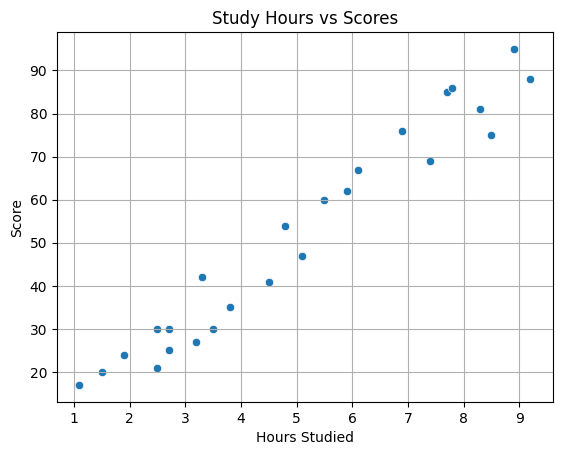

In [ ]:
sns.scatterplot(data=df, x="Hours", y="Scores")
plt.title("Study Hours vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.grid(True)
plt.show()

## 🔹 Step 4: Prepare the Features and Target

We define:
- `X`: input feature (Hours studied)
- `y`: output/target (Scores)
Note: `X` must be 2D for sklearn.

In [ ]:
X = df[["Hours"]]
y = df["Scores"]

## 🔹 Step 5: Split the Dataset

We split the dataset into training and testing sets using an 80/20 ratio.  
`random_state=42` ensures reproducibility.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🔹 Step 6.1: Peek Again at the DataFrame

Rechecking the dataset after splitting (optional step).

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## 🔹 Step 6.2: Train the Linear Regression Model

We fit the `LinearRegression` model using training data.  
The model will learn the best-fit line to minimize prediction error.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 🔹 Step 6.3: View the Regression Equation

Once trained, we can display the learned linear equation:  
**Score = m * Hours + c**, where:
- `m`: slope (coefficient)
- `c`: intercept

In [ ]:
print(f"Model Equation: Score = {model.coef_[0]:.2f} * Hours + {model.intercept_:.2f}")

Model Equation: Score = 9.68 * Hours + 2.83


## 🔹 Step 6.4: Predict on Test Set

We use the trained model to predict scores on the test set.

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

## 🔹 Step 6.5: Evaluate the Model

We evaluate the performance using:
- **MAE** (Mean Absolute Error)
- **MSE** (Mean Squared Error)
- **R² Score**: how well the line fits the data (1 = perfect)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 3.92
MSE: 18.94
R² Score: 0.97


## 🔹 Step 6.6: Actual vs Predicted (Bar Chart)

This chart helps us visualize the difference between predicted and actual scores.

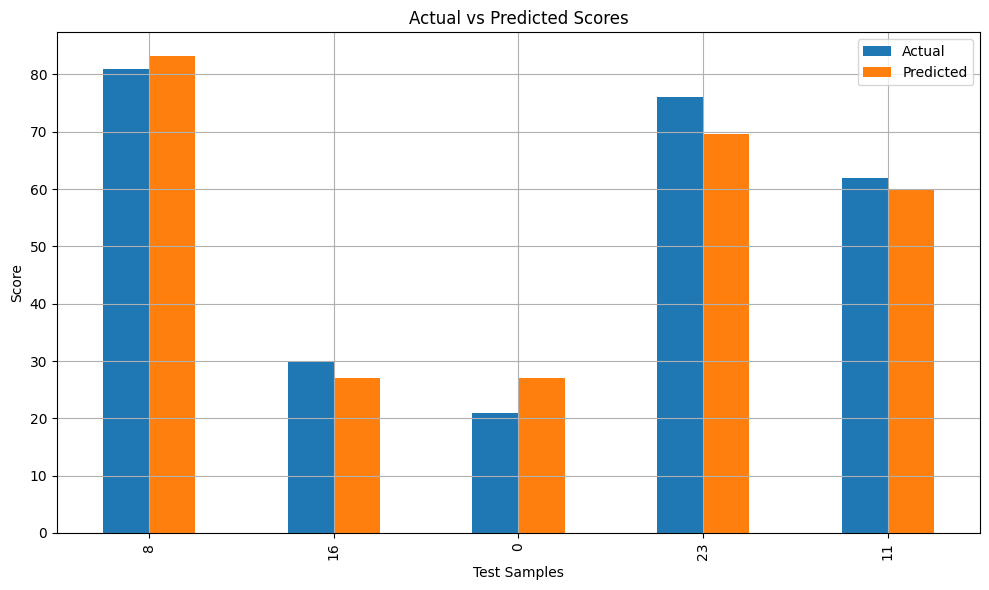

In [ ]:
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
results.plot(kind="bar", figsize=(10,6))
plt.title("Actual vs Predicted Scores")
plt.xlabel("Test Samples")
plt.ylabel("Score")
plt.grid(True)
plt.tight_layout()
plt.show()

## 🔹 Step 7: Plot the Regression Line on All Data

Visualize how the regression line fits all the data points.  
Blue = data points, Red = predicted regression line.

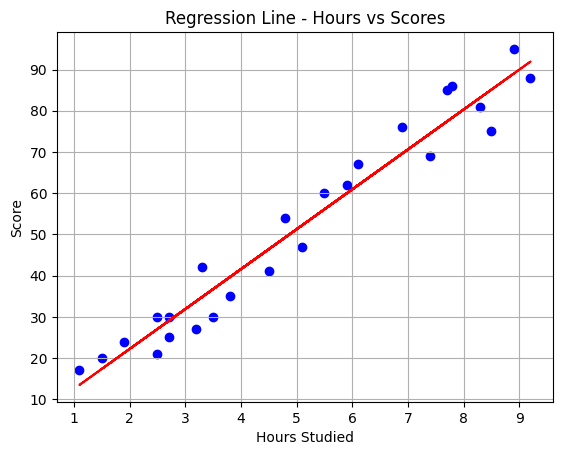

In [ ]:
plt.scatter(X, y, color="blue")
plt.plot(X, model.predict(X), color="red")
plt.title("Regression Line - Hours vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.grid(True)
plt.show()

## 🔹 Step 8: Predict Score for Custom Input

We take input (study hours) from the user and predict the score using the trained model.

In [ ]:
hours = float(input("Enter number of study hours: "))
predicted_score = model.predict([[hours]])
print(f"Predicted Score: {predicted_score[0]:.2f}")

Enter number of study hours: 5
Predicted Score: 51.24


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 🔹 Step 9: Save the Trained Model

We use `joblib` to save the trained model so it can be reused without retraining.

In [ ]:
joblib.dump(model, "study_score_model.pkl")

['study_score_model.pkl']

## 🔹 Step 10: Load & Reuse the Model

Load the saved model from disk and make a prediction on a new input (e.g., 7.5 hours).

In [ ]:
loaded_model = joblib.load("study_score_model.pkl")
loaded_model.predict([[7.5]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([75.44247851])

## ✅ Summary & Key Learnings

- Built and evaluated a Linear Regression model
- Learned how to:
  - Load and explore a dataset
  - Visualize relationships
  - Train, predict, and evaluate a model
  - Save and reuse the trained model
- Next → Try a classification task using the Iris dataset 🌸